In [27]:
import pandas as pd
import numpy as np
import mat73
from matplotlib import pyplot as plt
import scipy.signal as signal

In [2]:
# Import the matlab files
data_dict = mat73.loadmat(r'D:/MarkS3/Documents/Homework/python_hackathon/AllEEG.mat')

In [3]:
# Parse the different fields of the structure
data_dict['AllEEG'].keys()

dict_keys(['AdEEG', 'BDMEEG', 'SubID', 'Triggers'])

In [4]:
# Parse the different fields of the structure
bdm = data_dict['AllEEG'].BDMEEG
ad = data_dict['AllEEG'].AdEEG
subid = data_dict['AllEEG'].SubID
triggers = data_dict['AllEEG'].Triggers

In [5]:
# Parse BDM data
bdm_eeg = []
bdm_cat = []
bdm_item = []
bdm_label = []
bdm_repitition = []
for i in range(len(bdm)):
    bdm_eeg.append(bdm[i]['EEG'])
    bdm_cat.append(bdm[i]['Category'])
    bdm_item.append(bdm[i]['Item'])
    bdm_label.append(bdm[i]['Label'])
    bdm_repitition.append(bdm[i]['Repitition'])

In [6]:
# Construct BDM Dataframe
colnames = ['sub_id','eeg','category','label','repitition']
bdm_df = pd.DataFrame(data=[subid, bdm_eeg, bdm_cat, bdm_label, bdm_repitition],
                     index=colnames).transpose()
bdm_df

,sub_id,eeg,category,label,repitition
0,201.0,"[[[22.125034535927973, 17.653907708965182, 3.8...","[Beverages, Hygene, Hygene, Breakfast, DryGood...","[80.6, 100.0, 100.0, 70.7, 100.0, 100.0, 40.6,...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
1,202.0,"[[[-21.994701257668293, -22.64169758094087, -1...","[Breakfast, Hygene, Snacks, Snacks, Hygene, Hy...","[11.8, 49.9, 100.0, 15.7, 22.5, 67.9, 4.6, 0.0...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
2,203.0,"[[[-28.857335789861164, -0.5584103908041484, 1...","[Hygene, DryGoods, Snacks, Beverages, Snacks, ...","[52.7, 42.0, 24.6, 27.5, 39.1, 50.0, 61.3, 53....","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
3,205.0,"[[[-2.993871875843849, -17.9540161440607, -37....","[Breakfast, DryGoods, Snacks, Hygene, Hygene, ...","[42.7, 44.7, 32.2, 41.6, 25.8, 51.1, 57.5, 63....","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
4,204.0,"[[[-0.5200691111319484, 19.232242800027514, 32...","[Breakfast, Hygene, DryGoods, Hygene, Snacks, ...","[12.0, 13.0, 30.1, 25.8, 11.9, 9.0, 10.7, 11.0...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
...,...,...,...,...,...
67,269.0,"[[[nan, nan, nan, nan, nan, nan, nan, nan, nan...","[Beverages, Breakfast, Breakfast, Snacks, Snac...","[43.4, 6.3, 15.4, 85.0, 74.0, 97.3, 60.0, 85.3...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
68,270.0,"[[[nan, nan, nan, nan, nan, nan, nan, nan, nan...","[Breakfast, DryGoods, Snacks, Snacks, Hygene, ...","[33.7, 93.3, 55.0, 70.3, 67.6, 0.0, 0.0, 83.9,...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
69,271.0,"[[[nan, nan, nan, nan, nan, nan, nan, nan, nan...","[DryGoods, Hygene, Breakfast, Hygene, Hygene, ...","[33.7, 6.0, 42.3, 50.0, 60.0, 14.5, 0.0, 4.1, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
70,272.0,"[[[nan, nan, nan, nan, nan, nan, nan, nan, nan...","[Breakfast, Beverages, DryGoods, Beverages, Dr...","[54.7, 0.1, 80.2, 25.4, 0.0, 30.4, 76.2, 50.1,...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."


In [7]:
# Parse Ad data
ad[0].keys()

dict_keys(['AdID', 'Category', 'EEG', 'Item', 'ItemID', 'Label', 'Liking', 'Repitition', 'nArtifacts'])

In [8]:
# Parse Ad data
ad_eeg = []
ad_id = []
ad_cat = []
ad_item = []
ad_label = []
ad_repitition = []
ad_item_id = []
ad_liking = []
for i in range(len(ad)):
    ad_eeg.append(ad[i]['EEG'])
    ad_cat.append(ad[i]['Category'])
    ad_item.append(ad[i]['Item'])
    ad_label.append(ad[i]['Label'])
    ad_repitition.append(ad[i]['Repitition'])
    ad_id.append(ad[i]['AdID'])
    ad_item_id.append(ad[i]['ItemID'])
    ad_liking.append(ad[i]['Liking'])

In [9]:
# Construct Ad Dataframe
colnames = ['sub_id','eeg','ad_id','category','item','label','repitition','item_id','liking']
ad_df = pd.DataFrame(data=[subid, ad_eeg, ad_id, ad_cat, ad_item, ad_label, ad_repitition, ad_item_id, ad_liking],
                     index=colnames).transpose()
ad_df

,sub_id,eeg,ad_id,category,item,label,repitition,item_id,liking
0,201.0,"[[[6.169504138131352, 1.4996781805581034, 0.88...","[3033.0, 1025.0, 5031.0, 2052.0, 3013.0, 2021....","[DryGoods, Breakfast, Snacks, Beverages, DryGo...","[Prince, Branflakesextra, Parachocolate, Nevio...","[99.5, 50.8, 49.8, 76.6, 78.4, 100.0, 21.7, 14...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[303.0, 102.0, 503.0, 205.0, 301.0, 202.0, 203...","[7.0, 5.0, 5.6, 6.0, 6.4, 5.3, 4.4, 1.6, 5.8, ..."
1,202.0,"[[[-33.62552937137222, -40.576947626845694, -4...","[1022.0, 1013.0, 5031.0, 1032.0, 1033.0, 1004....","[Breakfast, Breakfast, Snacks, Breakfast, Brea...","[Branflakesextra, Branflakes, Parachocolate, C...","[40.6, 43.0, 99.1, 8.7, 6.8, 42.4, 91.0, 58.4,...","[1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, ...","[102.0, 101.0, 503.0, 103.0, 103.0, 100.0, 400...","[1.2, 3.6, 6.6, 4.5, 4.2, 0.4, 6.9, 6.9, 1.4, ..."
2,203.0,"[[[-28.704165475027917, -23.426044614327523, -...","[2031.0, 5032.0, 1014.0, 4011.0, 3034.0, 2023....","[Beverages, Snacks, Breakfast, Hygene, DryGood...","[Wissotzky, Parachocolate, Branflakes, Colgate...","[62.8, 16.7, 79.8, 49.7, 51.4, 26.4, 51.4, 59....","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 1.0, ...","[203.0, 503.0, 101.0, 401.0, 303.0, 202.0, 401...","[1.7, 2.9, 5.3, 3.1, 3.9, 2.1, 4.2, 3.3, 3.8, ..."
3,205.0,"[[[3.0643518516300334, 5.613266465102814, 4.19...","[4041.0, 5033.0, 4032.0, 5011.0, 3021.0, 5055....","[Hygene, Snacks, Hygene, Snacks, DryGoods, Sna...","[Sano99, Parachocolate, Zipperbigbag, Oreo, Ki...","[74.0, 50.0, 31.1, 54.8, 63.0, 40.6, 32.2, 32....","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, ...","[404.0, 503.0, 403.0, 501.0, 302.0, 505.0, 402...","[4.2, 6.0, 2.4, 4.3, 3.5, 5.7, 2.5, 3.7, 5.0, ..."
4,204.0,"[[[-17.018576892080645, -19.12734799512561, -2...","[3032.0, 1004.0, 3026.0, 5022.0, 1031.0, 3002....","[DryGoods, Breakfast, DryGoods, Snacks, Breakf...","[Prince, Quaker, Kikkoman, Tapuchips, Chocolat...","[42.1, 51.9, 17.2, 1.4, 14.3, 0.0, 15.0, 13.9,...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, ...","[303.0, 100.0, 302.0, 502.0, 103.0, 300.0, 103...","[7.0, 5.5, 3.0, 2.2, 6.9, 2.5, 6.9, 3.8, 6.7, ..."
...,...,...,...,...,...,...,...,...,...
67,269.0,"[[[nan, nan, nan, nan, nan, nan, nan, nan, nan...","[1031.0, 3006.0, 3032.0, 5023.0, 5042.0, 2043....","[Breakfast, DryGoods, DryGoods, Snacks, Snacks...","[ChocolateSpread, Filtuna, Prince, Tapuchips, ...","[61.8, 100.0, 0.0, 49.9, 63.2, 0.0, 65.7, 49.9...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[103.0, 300.0, 303.0, 502.0, 504.0, 204.0, 403...","[3.5, 7.0, 1.8, 3.5, 5.7, 4.4, 3.5, 2.5, 4.7, ..."
68,270.0,"[[[nan, nan, nan, nan, nan, nan, nan, nan, nan...","[5011.0, 5022.0, 2053.0, 3044.0, 4031.0, 4002....","[Snacks, Snacks, Beverages, DryGoods, Hygene, ...","[Oreo, Tapuchips, Neviot, HEINZ, Zipperbigbag,...","[26.9, 0.0, 69.3, 10.0, 0.0, 0.0, 73.0, 26.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, ...","[501.0, 502.0, 205.0, 304.0, 403.0, 400.0, 205...","[6.2, 3.6, 7.0, 3.1, 4.1, 4.2, 7.0, 6.7, 3.5, ..."
69,271.0,"[[[nan, nan, nan, nan, nan, nan, nan, nan, nan...","[5005.0, 2053.0, 4015.0, 5054.0, 1013.0, 5044....","[Snacks, Beverages, Hygene, Snacks, Breakfast,...","[Baracke, Neviot, Colgate, Fitness, Branflakes...","[25.3, 30.1, 0.0, 10.0, 4.2, 0.0, 10.1, 44.5, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, ...","[500.0, 205.0, 401.0, 505.0, 101.0, 504.0, 505...","[3.5, 4.9, 0.3, 0.0, 1.5, 2.0, 4.3, 0.6, 0.1, ..."
70,272.0,"[[[nan, nan, nan, nan, nan, nan, nan, nan, nan...","[3004.0, 4012.0, 4016.0, 1013.0, 2052.0, 5041....","[DryGoods, Hygene, Hygene, Breakfast, Beverage...","[Filtuna, Colgate, Colgate, Branflakes, Neviot...","[0.0, 29.4, 31.6, 25.2, 21.6, 70.8, 58.1, 0.0,...","[1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, ...","[300.0, 401.0, 401.0, 101.0, 205.0, 504.0, 304...","[1.0, 2.1, 2.3, 3.5, 1.6, 5.3, 4.0, 2.5, 1.1, ..."


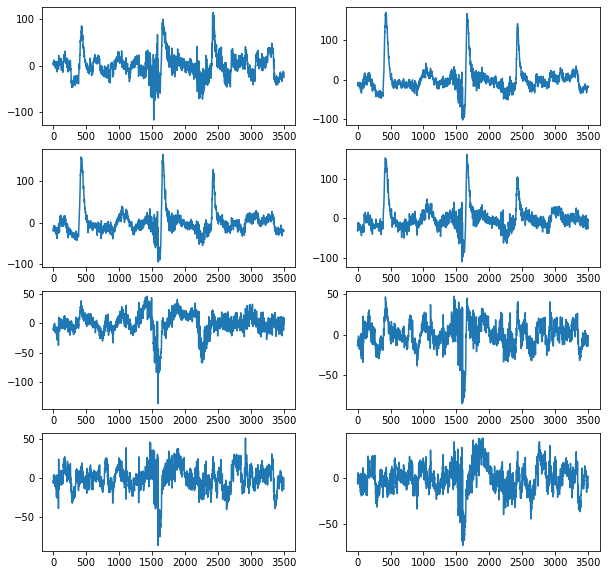

In [32]:
# Examine a single eeg recording (The first subject, first trial):
sample = ad_df.eeg[0][0][0]
fig, axes = plt.subplots(4,2, figsize=(10,10))
axes = axes.flatten()
for i in range(len(axes)):
    axes[i].plot(range(len(ad_df.eeg[0][0][i])),ad_df.eeg[0][0][i])
    



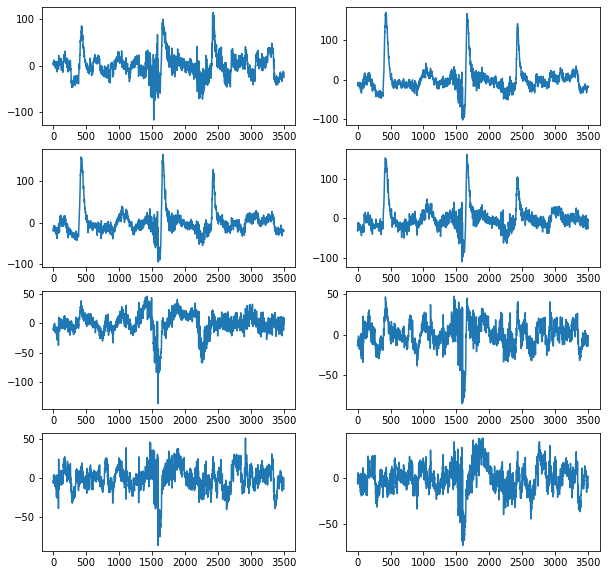

In [36]:
# Examine a single eeg recording (The first subject, first trial):
samples = ad_df.eeg[0][0]
fig, axes = plt.subplots(4,2, figsize=(10,10))
axes = axes.flatten()
for i in range(len(axes)):
    axes[i].plot(range(len(samples[i])),samples[i])


In [34]:
def get_frequncy_indices(freqs, bottom_frequncy, top_frequncy):
    """
    returns the indices of a frequency band in the list of frequencies extracted from Fourier Transform 

    Parameters
    ----------
    freqs : list, float
       list of frequencies extracted from a real fast Fourier Transform (np.rfft)
       
    bottom_frequency, top_frequency : float
        the bottom and top frequency of the frequency band in interest

    Returns
    ----------
    frequency_indices : list, int
        the indices of the in freqs that for the frequency band in interest 
    """
    freqs_above_bottom = freqs[freqs>bottom_frequncy]
    freqs_below_top = freqs[freqs<top_frequncy]
    # the first index of freqs_above_bottom is the lowest frequncy in the desired range
    bottom_index = np.where(freqs == freqs_above_bottom[0])[0][0]
    # the last index of freqs_below_top is the highest frequnecy in the desired range
    top_index = np.where(freqs == freqs_below_top[-1])[0][0]
    # adding +1 to include the top index
    frequncy_indices = list(range(bottom_index, top_index+1))
    
    return frequncy_indices

In [90]:
def plot_specto(subject_num, trial, bottom_specto_lim, top_specto_lim):
    """
    Plots spectogram and signal of the 8 electrodes of a single trial

    Parameters
    ----------
    physio, patho : np.array, float
       two arrays representing 2 time series with 15000 amplitude datapoints each
       
    bottom_specto_lim, top_specto_lim : int
        bottom and top frequencies for the spectogram

    """

    BOTTOM_YLIM=bottom_specto_lim
    TOP_YLIM=top_specto_lim
    samples = ad_df.eeg[subject_num][trial]
    fig, axes = plt.subplots(4,2, figsize=(10,10))
    axes = axes.flatten()
    for i in range(len(samples)):
        fs = 500
        frequency, time, amplitudes_time = signal.spectrogram(samples[i], fs=500, nperseg=256//8, nfft=1024)
        FREQ_IND = get_frequncy_indices(frequency, bottom_specto_lim, top_specto_lim)
        axes[i].pcolormesh(time, frequency[FREQ_IND], amplitudes_time[FREQ_IND, :], cmap='jet')
        axes[i].set_xlabel('Time')
        axes[i].set_ylabel('Frequency')
        
    plt.subplots_adjust(hspace=0.3)
    

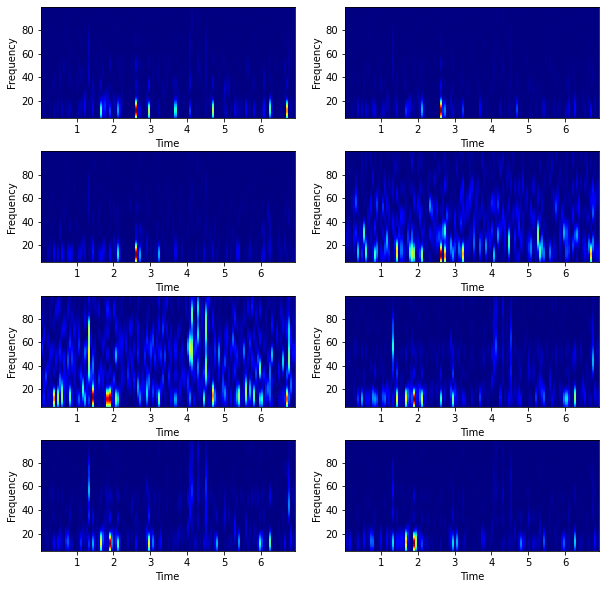

In [92]:
plot_specto(0,5,5,100)